In [109]:
output_folder = "/Users/Jayee/Library/CloudStorage/OneDrive-UW-Madison/PhD(my_PC)/PhD(output_files)/GPR/240623_understanding_GPR_length_scale_parameter"

# RBF Kernel functions

Let us develop a function

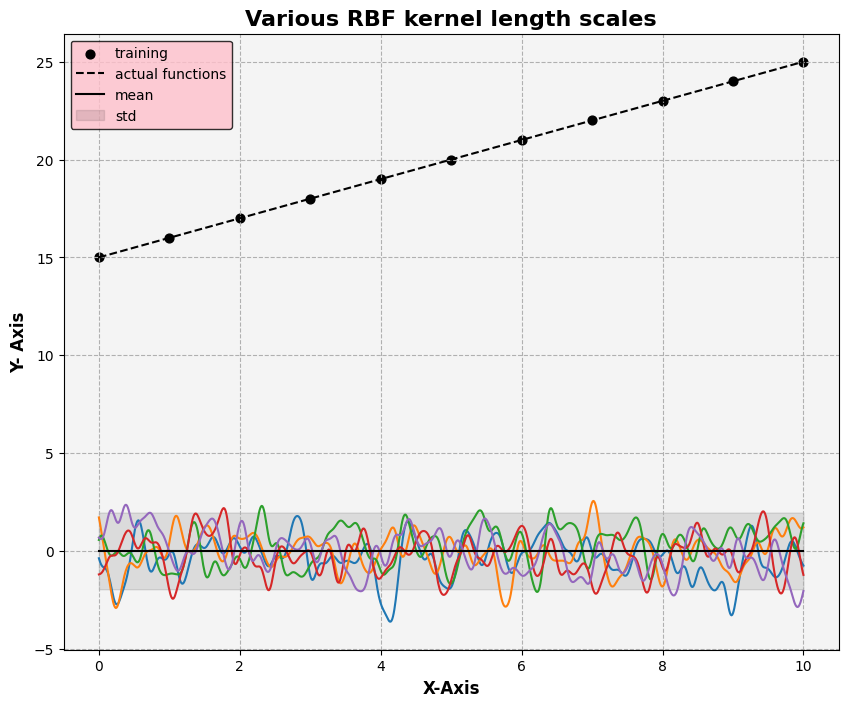

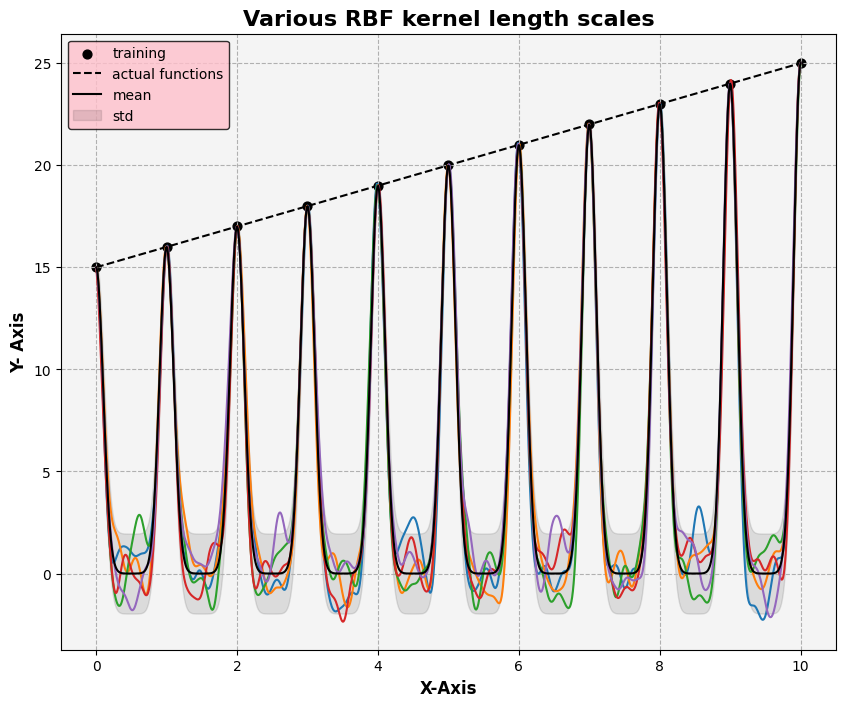

In [227]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.gaussian_process import GaussianProcessRegressor as GPR
from sklearn.gaussian_process.kernels import RBF, WhiteKernel
import numpy as np
import matplotlib.pyplot as plt
import os

def myfunc(x):
    c = 15
    y = x + c
    return y

def plotfunc(gprmodel,x_train,y_train):
    
    n_samples=5
    n_x_samples = 1000
    x_test = np.linspace(np.min(x_train),np.max(x_train), n_x_samples)
    y = myfunc(x_test)
    
    x_test_scaled = x_test.reshape(-1,1)
    x_test_scaled = scaler.transform(x_test_scaled)
    y_samples = gprmodel.sample_y(x_test_scaled,n_samples)
    x_mean,x_std = gprmodel.predict(x_test_scaled,return_std=True)
    
    fig,axs = plt.subplots(1,1,figsize=(10,8))
    axs.set_xlabel("X-Axis", fontweight= "bold", fontsize=12)
    axs.set_ylabel("Y- Axis", fontweight ="bold", fontsize=12)
    axs.set_title("Various RBF kernel length scales", fontweight="bold", fontsize=16)
    axs.set_facecolor("#f4f4f4")
    axs.grid(True, linestyle="--")
    
    axs.scatter(x_train,y_train,color="black",s=40, label="training")
    axs.plot(x_test,y, "k--", label="actual functions")
    axs.plot(x_test,y_samples)
    axs.plot(x_test, x_mean, label="mean", color = "black")
   
    axs.fill_between(x_test, 
                     x_mean+1.96*x_std, x_mean-1.96*x_std,
                     color="black",alpha=0.1, label="std")
    legend = axs.legend( loc="best",facecolor="pink",edgecolor="black")
    return fig

x_train = np.linspace(0,10,11)
y_train = myfunc(x_train)
scaler = MinMaxScaler()
scaler.fit(x_train.reshape(-1,1))
x_train_scaled = scaler.transform(x_train.reshape(-1,1))

#Defining the Kernel
kernel= 1*RBF(length_scale=0.01,length_scale_bounds=[1e-2,1e2]) 

# untrained model
gpr_model_untrained = GPR(kernel=kernel, random_state=0,n_restarts_optimizer=10)
untrained_l_1en1=plotfunc(gpr_model_untrained,x_train,y_train)

# trained model
gpr_model_trained = GPR(kernel=kernel, random_state=0,n_restarts_optimizer=10, optimizer=None)
gpr_model_trained.fit(x_train_scaled,y_train)
trained_l_1en1=plotfunc(gpr_model_trained, x_train,y_train)

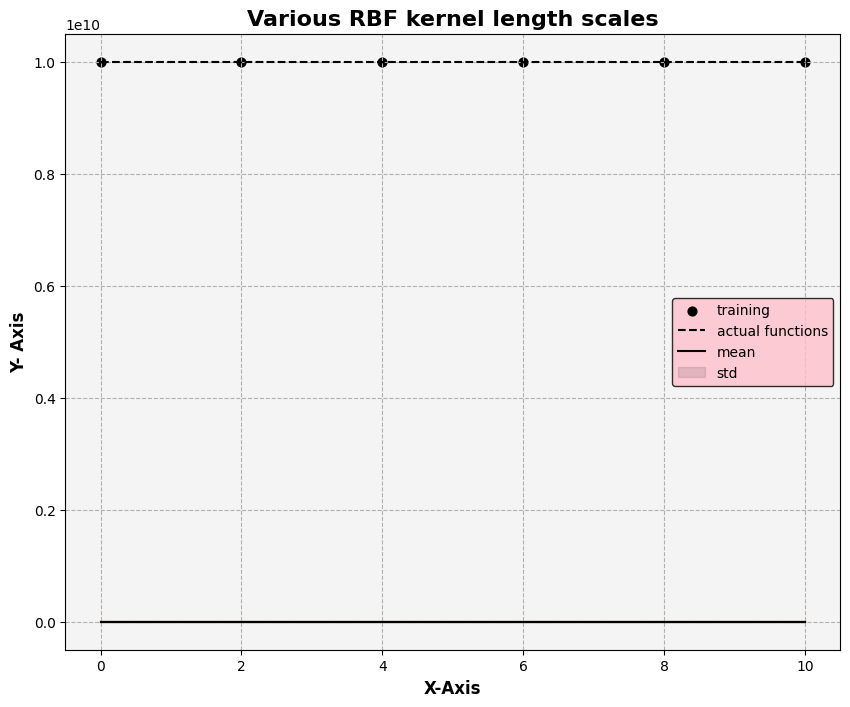

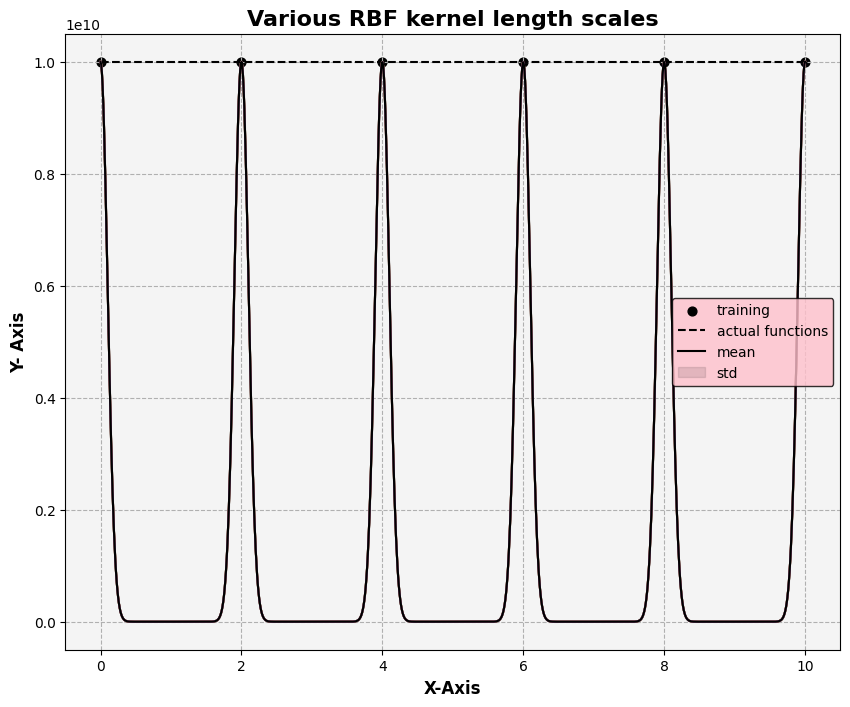

In [187]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.gaussian_process import GaussianProcessRegressor as GPR
from sklearn.gaussian_process.kernels import RBF, WhiteKernel
import numpy as np
import matplotlib.pyplot as plt
import os

def myfunc(x):
    c = 1e10
    y = x * np.sin(x) + c
    return y

def plotfunc(gprmodel,x_train,y_train):
    
    n_samples=5
    n_x_samples = 1000
    x_test = np.linspace(np.min(x_train),np.max(x_train), n_x_samples)
    y = myfunc(x_test)
    
    x_test_scaled = x_test.reshape(-1,1)
    x_test_scaled = scaler.transform(x_test_scaled)
    y_samples = gprmodel.sample_y(x_test_scaled,n_samples)
    x_mean,x_std = gprmodel.predict(x_test_scaled,return_std=True)
    
    fig,axs = plt.subplots(1,1,figsize=(10,8))
    axs.set_xlabel("X-Axis", fontweight= "bold", fontsize=12)
    axs.set_ylabel("Y- Axis", fontweight ="bold", fontsize=12)
    axs.set_title("Various RBF kernel length scales", fontweight="bold", fontsize=16)
    axs.set_facecolor("#f4f4f4")
    axs.grid(True, linestyle="--")
    
    axs.scatter(x_train,y_train,color="black",s=40, label="training")
    axs.plot(x_test,y, "k--", label="actual functions")
    axs.plot(x_test,y_samples)
    axs.plot(x_test, x_mean, label="mean", color = "black")
   
    axs.fill_between(x_test, 
                     x_mean+1.96*x_std, x_mean-1.96*x_std,
                     color="black",alpha=0.1, label="std")
    legend = axs.legend( loc="best",facecolor="pink",edgecolor="black")
    return fig

x_train = np.linspace(0,10,6)
y_train = myfunc(x_train)
scaler = MinMaxScaler()
scaler.fit(x_train.reshape(-1,1))
x_train_scaled = scaler.transform(x_train.reshape(-1,1))

#Defining the Kernel
kernel= 1*RBF(length_scale=0.01,length_scale_bounds=[1e-2,1e2]) 

# untrained model
gpr_model_untrained = GPR(kernel=kernel, random_state=0,n_restarts_optimizer=10)
untrained_l_1en1=plotfunc(gpr_model_untrained,x_train,y_train)

# trained model
gpr_model_trained = GPR(kernel=kernel, random_state=0,n_restarts_optimizer=10, optimizer=None)
gpr_model_trained.fit(x_train_scaled,y_train)
trained_l_1en1=plotfunc(gpr_model_trained, x_train,y_train)

In [218]:
# saving the files
# file_name = "untrained_gpr_l_1en2_func1.pdf"
# file_name = os.path.join(output_folder,file_name)
# untrained_l_1en1.savefig(file_name)

file_name = "verification_l_01e3.pdf"
file_name = os.path.join(output_folder,file_name)
trained_l_1en1.savefig(file_name)
